Here is an illustration of the IFS T42 issue.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from src.score import *

In [37]:
# This is the regridded ERA data
DATADIR = '/data/weather-benchmark/5.625deg/'
z500_valid = load_test_data(f'{DATADIR}geopotential_500', 'z')
t850_valid = load_test_data(f'{DATADIR}temperature_850', 't')
era = xr.merge([z500_valid, t850_valid]).drop('level')

In [38]:
era

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 17520)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 2017-01-01 ... 2018-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
    t        (time, lat, lon) float32 dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>

In [39]:
# This is the data that was regridded by Peter
t42_raw = xr.open_dataset(f'/media/rasp/Elements/weather-benchmark/IFS_T42/output_42_pl_5.625.nc')

In [40]:
# Make longitude dimensions match 
t42_raw['lat'] = -era.lat
t42_raw = t42_raw.roll(lon=32)
t42_raw['lon'] = era.lon

/home/rasp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
t42_raw

<xarray.Dataset>
Dimensions:  (lat: 32, lev: 4, lon: 64, time: 522)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 87.19 81.56 75.94 70.31 ... -75.94 -81.56 -87.19
  * lev      (lev) float64 1e+05 8.5e+04 5e+04 2e+04
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T06:00:00 ... 2017-05-07
Data variables:
    z        (time, lev, lat, lon) float32 2527.1328 2531.6328 ... 104330.81
    t        (time, lev, lat, lon) float32 252.19034 252.66104 ... 211.4829
    r        (time, lev, lat, lon) float32 102.375885 101.69815 ... 36.225117
    u        (time, lev, lat, lon) float32 -3.0982819 -3.216446 ... 5.4210052
    v        (time, lev, lat, lon) float32 2.1054688 1.8027344 ... -10.524429
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.4
    history:      Thu Dec 19 14:44:53 2019: cdo -f nc copy output_42_pl_5.625...
    institution:  European Centr

Let's now plot the initial conditions of the first forecast.

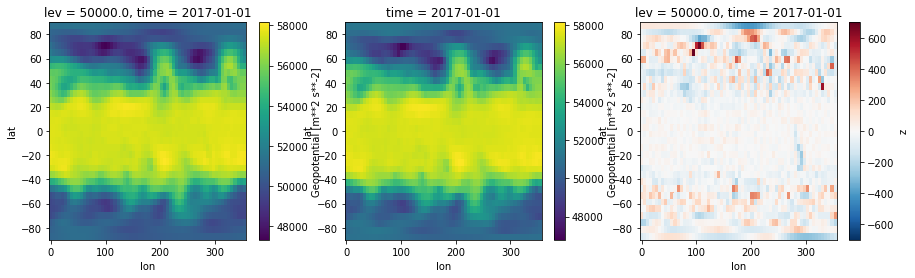

In [42]:
# Plot for Z500 with difference
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.z.isel(time=0).sel(lev=5e4).plot(ax=axs[0]);
era.z.isel(time=0).plot(ax=axs[1])
(t42_raw.z.isel(time=0).sel(lev=5e4)-era.z.isel(time=0)).plot(ax=axs[2]);

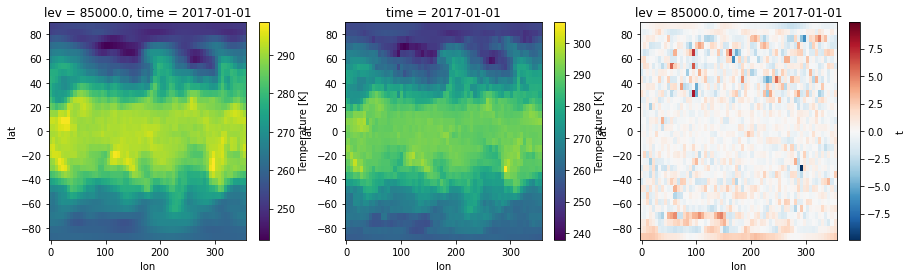

In [43]:
# Same for T850
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.t.isel(time=0).sel(lev=8.5e4).plot(ax=axs[0]);
era.t.isel(time=0).plot(ax=axs[1])
(t42_raw.t.isel(time=0).sel(lev=8.5e4)-era.t.isel(time=0)).plot(ax=axs[2]);

We can see that the ERA field is a lot noisier that the smooth T42 field. This is obviously worse for T than for Z, which causes the RMSE for T to be much worse. 

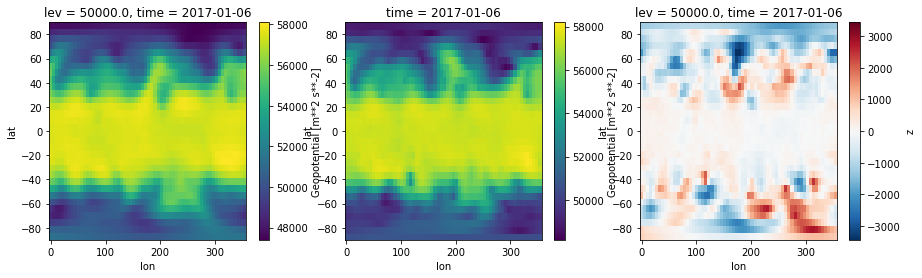

In [44]:
# Now for a 5 day forecast
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.z.isel(time=5*24//6).sel(lev=5e4).plot(ax=axs[0]);
era.z.isel(time=5*24).plot(ax=axs[1])
(t42_raw.z.isel(time=5*24//6).sel(lev=5e4)-era.z.isel(time=5*24)).plot(ax=axs[2]);

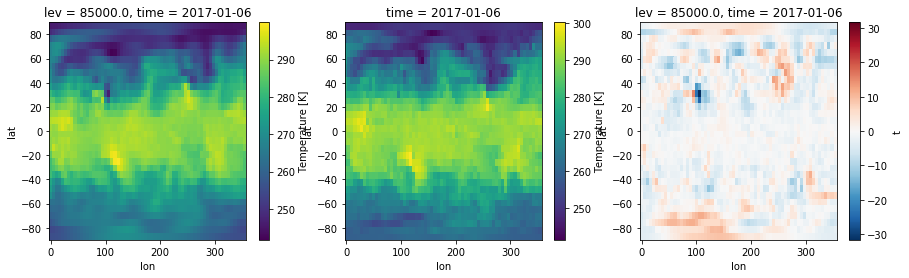

In [46]:
# Same for T850
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.t.isel(time=5*24//6).sel(lev=8.5e4).plot(ax=axs[0]);
era.t.isel(time=5*24).plot(ax=axs[1])
(t42_raw.t.isel(time=5*24//6).sel(lev=8.5e4)-era.t.isel(time=5*24)).plot(ax=axs[2]);

So one weird thing here is that we have a 30(!) degree temperature error in the forecast. That doesn't seem physical, right?

Since T42 is started from ERA ICs the question is: Why is it so much smoother? Does it have to do with the interpolation. To check that, let's do the same analysis for the 2.8125 degree data.

In [47]:
# This is the regridded ERA data
DATADIR = '/media/rasp/Elements/weather-benchmark/2.8125deg/'
z500_valid = load_test_data(f'{DATADIR}geopotential', 'z')
t850_valid = load_test_data(f'{DATADIR}temperature', 't')
era = xr.merge([z500_valid, t850_valid])

In [48]:
era

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, time: 17520)
Coordinates:
  * lat      (lat) float64 -88.59 -85.78 -82.97 -80.16 ... 82.97 85.78 88.59
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) datetime64[ns] 2017-01-01 ... 2018-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 dask.array<chunksize=(8760, 64, 128), meta=np.ndarray>
    t        (time, lat, lon) float32 dask.array<chunksize=(8760, 64, 128), meta=np.ndarray>

In [49]:
# This is the data that was regridded by Peter
t42_raw = xr.open_dataset(f'/media/rasp/Elements/weather-benchmark/IFS_T42/output_42_pl_2.8125.nc')

In [50]:
# Make longitude dimensions match 
t42_raw['lat'] = -era.lat
t42_raw = t42_raw.roll(lon=64)
t42_raw['lon'] = era.lon

/home/rasp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
t42_raw

<xarray.Dataset>
Dimensions:  (lat: 64, lev: 4, lon: 128, time: 522)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 88.59 85.78 82.97 80.16 ... -82.97 -85.78 -88.59
  * lev      (lev) float64 1e+05 8.5e+04 5e+04 2e+04
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T06:00:00 ... 2017-05-07
Data variables:
    z        (time, lev, lat, lon) float32 2507.011 2516.261 ... 104317.44
    t        (time, lev, lat, lon) float32 248.86523 248.85547 ... 211.37675
    r        (time, lev, lat, lon) float32 101.81477 101.46712 ... 32.710007
    u        (time, lev, lat, lon) float32 0.31747437 0.58309937 ... 1.1755676
    v        (time, lev, lat, lon) float32 6.0052795 5.8402405 ... -12.155655
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.4
    history:      Thu Dec 19 16:10:03 2019: cdo -f nc copy output_42_pl_2.812...
    institution:  European Centr

Let's now plot the initial conditions of the first forecast.

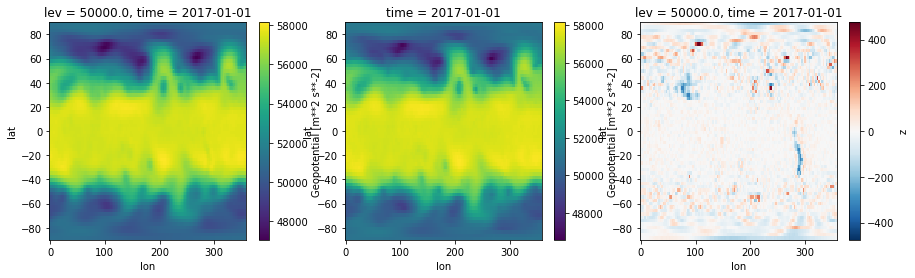

In [52]:
# Plot for Z500 with difference
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.z.isel(time=0).sel(lev=5e4).plot(ax=axs[0]);
era.z.isel(time=0).plot(ax=axs[1])
(t42_raw.z.isel(time=0).sel(lev=5e4)-era.z.isel(time=0)).plot(ax=axs[2]);

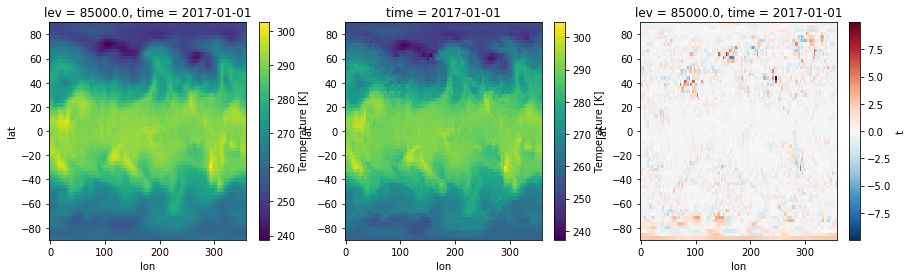

In [53]:
# Same for T850
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.t.isel(time=0).sel(lev=8.5e4).plot(ax=axs[0]);
era.t.isel(time=0).plot(ax=axs[1])
(t42_raw.t.isel(time=0).sel(lev=8.5e4)-era.t.isel(time=0)).plot(ax=axs[2]);

As you can see the T42 forecasts are still much smoother. So why is that?

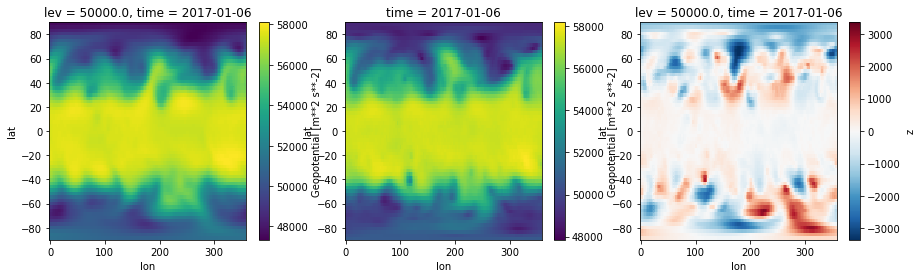

In [54]:
# Now for a 5 day forecast
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.z.isel(time=5*24//6).sel(lev=5e4).plot(ax=axs[0]);
era.z.isel(time=5*24).plot(ax=axs[1])
(t42_raw.z.isel(time=5*24//6).sel(lev=5e4)-era.z.isel(time=5*24)).plot(ax=axs[2]);

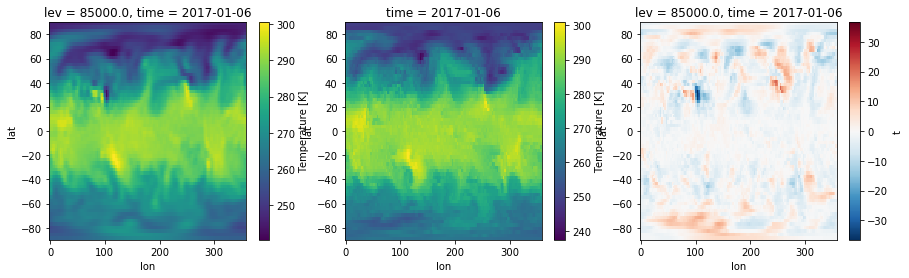

In [55]:
# Same for T850
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.t.isel(time=5*24//6).sel(lev=8.5e4).plot(ax=axs[0]);
era.t.isel(time=5*24).plot(ax=axs[1])
(t42_raw.t.isel(time=5*24//6).sel(lev=8.5e4)-era.t.isel(time=5*24)).plot(ax=axs[2]);

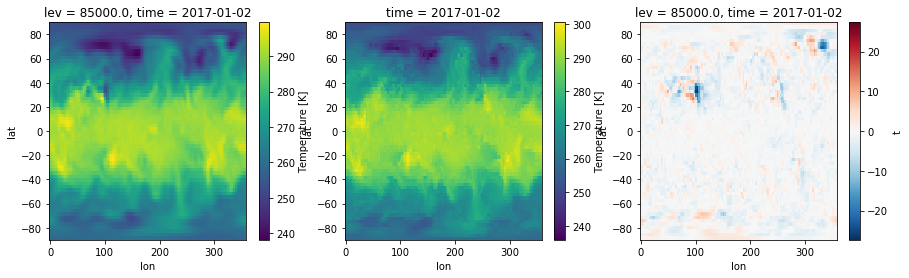

In [68]:
# Same for T850; now for 1 forecast lead time
t = 24
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
t42_raw.t.isel(time=t//6).sel(lev=8.5e4).plot(ax=axs[0]);
era.t.isel(time=t).plot(ax=axs[1])
(t42_raw.t.isel(time=t//6).sel(lev=8.5e4)-era.t.isel(time=t)).plot(ax=axs[2]);

We still have that huge temperature error. Let's check where that is.

In [57]:
import cartopy.crs as ccrs

In [62]:
diff = t42_raw.t.isel(time=5*24//6).sel(lev=8.5e4)-era.t.isel(time=5*24).load()

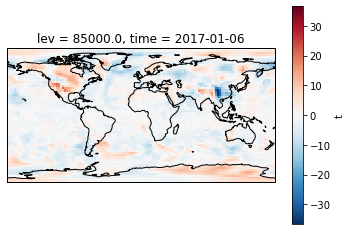

In [64]:
ax = plt.axes(projection=ccrs.PlateCarree())
diff.plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_global(); ax.coastlines()

So the huge error is over Eastern China? I almost suspect that this is the main reason for the bad RMSEs. 